# qHTS for Inhibitors of human tyrosyl-DNA phosphodiesterase 1 (TDP1): qHTS in cells in absence of CPT

## Introduction
Human tyrosyl-DNA phosphodiesterase 1 (TDP1) is a novel repair gene, and we propose to use it as a new target for anticancer drug development. TDP1 is not an essential protein, but under treatment with topoisomerase I poison (camptothecin: CPT), TDP1 works as a critical factor for cell survival. To directly identify novel TDP1 inhibitors active in a cellular environment, we have knocked-out the Tdp1 gene in chicken DT40 cells (Tdp1-/-) and generated a complemented counterpart cells that contains a stable transfection of the human TDP1 gene (Tdp1-/-;hTDP1 cells). For the primary screen, Tdp1-/-;hTDP1 cells will be exposed to small molecules in the presence or absence of CPT, and their growth kinetics will be evaluated after 48 hours by measuring ATP activity. If a given compound shows a synergistic effect with CPT, this compound could inhibit the repair pathway of CPT-induced lesions including the TDP1-mediated repair pathway. The hit compounds will then be evaluated in the presence or absence of CPT using Tdp1-/- cells. If a compound shows synergistic effect with CPT in Tdp1-/-;hTDP1 cells, but not with Tdp1-/- cells, such compound could be involved in the TDP1-mediated repair pathway inhibition. In tertiary assays, biochemical gel-based assays will be used to assess whether the hit compounds specifically target TDP1.

## Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from standardizer.CustomStandardizer import CustomStandardizer
from loaders.Loaders import CSVLoader
import sys
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

sys.path.append('src')

## Initial exploration

### Carregar o dataset
The first step, analysing this dataset, includes loading and displaying TDP1 data.

In [2]:
file = '../dataset/TDP1_activity_dataset.csv'
dataset = pd.read_csv(file, sep=',')
dataset.head()

/home/laptop16/anaconda3/envs/smiles/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID PUBCHEM_ACTIVITY_OUTCOME  \
0                   1  109967258.0   50897788.0                   Active   
1                   2  144206324.0      65628.0                   Active   
2                   7  144206329.0      92140.0                   Active   
3                  16  144206459.0     148121.0                   Active   
4                  17  144206460.0   56840936.0                   Active   

   PUBCHEM_ACTIVITY_SCORE                               PUBCHEM_ACTIVITY_URL  \
0                    42.0  http://assay.nih.gov/htsws/rest/display/dd-tdp...   
1                    41.0  http://assay.nih.gov/htsws/rest/display/dd-tdp...   
2                    82.0  http://assay.nih.gov/htsws/rest/display/dd-tdp...   
3                    94.0  http://assay.nih.gov/htsws/rest/display/dd-tdp...   
4                    97.0  http://assay.nih.gov/htsws/rest/display/dd-tdp...   

   PUBCHEM_ASSAYDATA_COMMENT  Phenotype  Potency  Efficacy  Analysis Comment  \
0                        NaN  Inhibitor  14.1254  136.5470               NaN   
1                        NaN  Inhibitor  18.8375   82.1468               NaN   
2                        NaN  Inhibitor   5.9569   61.9164               NaN   
3                        NaN  Inhibitor   0.0237   97.3845               NaN   
4                        NaN  Inhibitor   0.0013   86.9215               NaN   

   Activity_Score               Curve_Description Fit_LogAC50  Fit_HillSlope  \
0            42.0   Partial curve - high efficacy       -4.85         1.0100   
1            41.0   Partial curve - high efficacy      -4.725         1.9887   
2            82.0  Complete curve - high efficacy      -5.225         4.5045   
3            94.0  Complete curve - high efficacy      -7.625         2.4064   
4            97.0  Complete curve - high efficacy      -8.875         4.0950   

   Fit_R2  Fit_InfiniteActivity  Fit_ZeroActivity  Fit_CurveClass  \
0  0.9948             -134.4880            2.0597            -2.1   
1  0.9829              -82.6097           -0.4629            -2.1   
2  0.9691              -60.9817            0.9346            -1.1   
3  0.9971              -92.6583            4.7262            -1.1   
4  0.9961              -77.2253            9.6962            -1.1   

   Excluded_Points  Max_Response  Activity at 0.0000295000 uM  \
0        0 0 0 0 0     -106.3110                          NaN   
1  0 0 0 0 0 0 0 0      -70.9545                          NaN   
2  0 0 0 0 0 0 0 0      -61.0446                          NaN   
3  0 0 0 0 0 0 0 0      -95.5529                          NaN   
4  0 0 0 0 0 0 0 0      -80.1864                          NaN   

   Activity at 0.0000590000 uM  Activity at 0.0001503265 uM  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   Activity at 0.0002712146 uM  Activity at 0.0005895491 uM  \
0                          NaN                          NaN   
1                          NaN                      -3.2819   
2                          NaN                      -2.4216   
3                          NaN                       7.8276   
4                          NaN                       6.9054   

   Activity at 0.00117 uM  Activity at 0.00179 uM  Activity at 0.00299 uM  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                  1.1641   
2                     NaN                     NaN                 -0.2644   
3                     NaN                     NaN                  0.4451   
4                     NaN                     NaN                -73.9506   

   Activity at 0.00672 uM  Activity at 0.014 uM  Activity at 0.026 uM  \
0  

### Simple Analyses
This following step was taken to analyse how data presents itself along the lines and collumns of the Datasets

In [3]:
dataset.size

1920000

In [4]:
dataset.shape

(40000, 48)

O nosso dataset foi carregado sobre o nome "dataset" que possui 40.000 moléculas distintas e 48 características da sua análise, totalizando em 1.920.000 valores.

In [5]:
dataset.columns

Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE',
       'PUBCHEM_ACTIVITY_URL', 'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype',
       'Potency', 'Efficacy', 'Analysis Comment', 'Activity_Score',
       'Curve_Description', 'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2',
       'Fit_InfiniteActivity', 'Fit_ZeroActivity', 'Fit_CurveClass',
       'Excluded_Points', 'Max_Response', 'Activity at 0.0000295000 uM',
       'Activity at 0.0000590000 uM', 'Activity at 0.0001503265 uM',
       'Activity at 0.0002712146 uM', 'Activity at 0.0005895491 uM',
       'Activity at 0.00117 uM', 'Activity at 0.00179 uM',
       'Activity at 0.00299 uM', 'Activity at 0.00672 uM',
       'Activity at 0.014 uM', 'Activity at 0.026 uM', 'Activity at 0.040 uM',
       'Activity at 0.074 uM', 'Activity at 0.167 uM', 'Activity at 0.363 uM',
       'Activity at 0.628 uM', 'Activity at 0.975 uM', 'Activity at 1.849 uM',
       'Activity at 4.119 uM', 'Ac

| ColumnsName | Description |
| :-: | :-: |
| **PUBCHEM_RESULT_TAG** | This column contains an increasing number starting from one. |
| **PUBCHEM_SID** | PubChem SubstanceID |
| **PUBCHEM_CID** | PubChem CompoundID |
| **PUBCHEM_ACTIVITY_OUTCOME** | This field allows the submitter to make an expert judgment call about the activity of each test result. Using a number, the value is set to 1 (inactive) or 2 (active) based on whatever means appropriate. In addition to active/inactive, this field can also be set to 3 (inconclusive), 4 (unspecified) or 5 (probe). The 'probe' designation indicates that the activity of the test result has been tested and confirmed though multiple rounds of experimental inquiry |
| **PUBCHEM_ACTIVITY_SCORE** | The activity of a test result may be assigned a normalized score between 0 and 100 where the most active result rows have scores closer to 100 and inactive closer to 0, so that one can rank the result based on this data and prioritize hits |
| **PUBCHEM_ACTIVITY_URL** | An URL may optionally be provided for Assay Data reported for this Substance in this column. |
| **PUBCHEM_ASSAYDATA_COMMENT** | Textual annotation and comments |
| **Potency** | Concentration at which compound exhibits half-maximal efficacy |
| **Efficacy** | Maximal efficacy of compound, reported as a percentage of control |
| **Analysis Comment** | Annotation/notes on a particular compound's data or its analysis |
| **Activity_Score** | Activity score |
| **Curve_Description** | A description of dose-response curve quality |
| **Fit_LogAC50** | The logarithm of the AC50 from a fit of the data to the Hill equation (calculated based on Molar Units) |
| **Fit_HillSlope** | The Hill slope from a fit of the data to the Hill equation |
| **Fit_R2** | R^2 fit value of the curve. Closer to 1.0 equates to better Hill equation fit |
| **Fit_InfiniteActivity** | The asymptotic efficacy from a fit of the data to the Hill equation |
| **Fit_ZeroActivity** | Efficacy at zero concentration of compound from a fit of the data to the Hill equation |
| **Fit_CurveClass** | Numerical encoding of curve description for the fitted Hill equation |
| **Excluded_Points** | Which dose-response titration points were excluded from analysis based on outlier analysis |
| **Max_Response** | Maximum activity observed for compound (usually at highest concentration tested) |
| **Activity at xx uM*** | % Activity at given concentration |
| **Compound QC** | NCGC designation for data stage: 'qHTS', 'qHTS Verification', 'Secondary Profiling' |
| **smiles** | SMILES (Simplified Molecular Input Line Entry System) is a chemical notation that allows a user to represent a chemical structure in a way that can be used by the computer. |

*Activity at xx uM corresponde as atividades em todas em concentraçoes presentes no dataset.

In [6]:
dataset.dtypes

PUBCHEM_RESULT_TAG               int64
PUBCHEM_SID                    float64
PUBCHEM_CID                    float64
PUBCHEM_ACTIVITY_OUTCOME        object
PUBCHEM_ACTIVITY_SCORE         float64
PUBCHEM_ACTIVITY_URL            object
PUBCHEM_ASSAYDATA_COMMENT      float64
Phenotype                       object
Potency                        float64
Efficacy                       float64
Analysis Comment               float64
Activity_Score                 float64
Curve_Description               object
Fit_LogAC50                     object
Fit_HillSlope                  float64
Fit_R2                         float64
Fit_InfiniteActivity           float64
Fit_ZeroActivity               float64
Fit_CurveClass                 float64
Excluded_Points                 object
Max_Response                   float64
Activity at 0.0000295000 uM    float64
Activity at 0.0000590000 uM    float64
Activity at 0.0001503265 uM    float64
Activity at 0.0002712146 uM    float64
Activity at 0.0005895491 

In [7]:
sub_dataset = dataset[['Potency', 'Efficacy', 'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2',
       'Fit_InfiniteActivity', 'Fit_ZeroActivity', 'Activity at 0.0000295000 uM',
       'Activity at 0.0000590000 uM', 'Activity at 0.0001503265 uM',
       'Activity at 0.0002712146 uM', 'Activity at 0.0005895491 uM',
       'Activity at 0.00117 uM', 'Activity at 0.00179 uM',
       'Activity at 0.00299 uM', 'Activity at 0.00672 uM',
       'Activity at 0.014 uM', 'Activity at 0.026 uM', 'Activity at 0.040 uM',
       'Activity at 0.074 uM', 'Activity at 0.167 uM', 'Activity at 0.363 uM',
       'Activity at 0.628 uM', 'Activity at 0.975 uM', 'Activity at 1.849 uM',
       'Activity at 4.119 uM', 'Activity at 9.037 uM', 'Activity at 15.83 uM',
       'Activity at 21.08 uM', 'Activity at 46.23 uM', 'Activity at 92.54 uM',
       'Activity at 165.6 uM']]

sub_dataset.describe()

Potency      Efficacy  Fit_HillSlope        Fit_R2  \
count  20030.000000  20030.000000   38208.000000  38208.000000   
mean      14.576385     96.992453       2.976413      0.875302   
std        7.230402     21.335634       1.482360      0.179660   
min        0.001300      4.737700       0.200000      0.300300   
25%        9.200000     82.368825       1.788500      0.821400   
50%       16.360100     96.297200       2.533400      0.970600   
75%       20.596200    111.422250       4.954900      0.993700   
max       38.869900    186.037000       4.954900      1.000000   

       Fit_InfiniteActivity  Fit_ZeroActivity  Activity at 0.0000295000 uM  \
count          38208.000000      38208.000000                          0.0   
mean             -55.874923         -2.191756                          NaN   
std               48.730687          9.992784                          NaN   
min             -171.676000       -126.305000                          NaN   
25%             -100.585000         -6.234325                          NaN   
50%              -69.471800         -1.248000                          NaN   
75%               -8.455775          2.976475                          NaN   
max               55.568000         46.025900                          NaN   

       Activity at 0.0000590000 uM  Activity at 0.0001503265 uM  \
count                          0.0                     2.000000   
mean                           NaN                     2.403950   
std                            NaN                     2.569131   
min                            NaN                     0.587300   
25%                            NaN                     1.495625   
50%                            NaN                     2.403950   
75%                            NaN                     3.312275   
max                            NaN                     4.220600   

       Activity at 0.0002712146 uM  Activity at 0.0005895491 uM  \
count                          0.0                   271.000000   
mean                           NaN                    -3.557925   
std                            NaN                    14.086167   
min                            NaN                   -89.497200   
25%                            NaN                    -5.878100   
50%                            NaN                    -1.091000   
75%                            NaN                     2.372200   
max                            NaN                    23.740700   

       Activity at 0.00117 uM  Activity at 0.00179 uM  Activity at 0.00299 uM  \
count               12.000000                9.000000            38700.000000   
mean                -0.236175                2.232467               -2.767132   
std                  8.757193                4.238672               10.600459   
min                -15.210000               -6.975500             -124.585000   
25%                 -5.627875                0.451300               -7.230900   
50%                 -0.126950                4.153200               -1.399500   
75%                  2.088900                5.143500                2.597625   
max                 18.811200                6.595400               43.627300   

       Activity at 0.00672 uM  Activity at 0.014 uM  Activity at 0.026 uM  \
count               32.000000           1692.000000             71.000000   
mean                -2.647712             -1.030801             -4.937286   
std                 17.535983             11.429548             20.749187   
min                -90.796900           -103.706000           -111.866000   
25%                 -5.573800             -4.143900             -4.231150   
50%                 -0.156150              0.151300              0.791900   
75%                  2.806800              3.728025              2.627950   
max                 26.864900             28.716800             10.887000   

       Activity at 0.040 uM  Activity at 0.074 uM  Activity at 0.167 uM  \
count  

## Pre-Processing

De seguida, o número de valores nao atríbuidos serao contados tanto na totalidade como por coluna.

### Visualization of the NA's

In [8]:
print(dataset.isna().sum())
print(f"TOTAL: {dataset.isna().sum().sum()}")

PUBCHEM_RESULT_TAG                 0
PUBCHEM_SID                        0
PUBCHEM_CID                       18
PUBCHEM_ACTIVITY_OUTCOME           0
PUBCHEM_ACTIVITY_SCORE             0
PUBCHEM_ACTIVITY_URL               0
PUBCHEM_ASSAYDATA_COMMENT      40000
Phenotype                          0
Potency                        19970
Efficacy                       19970
Analysis Comment               40000
Activity_Score                     1
Curve_Description              19955
Fit_LogAC50                    18124
Fit_HillSlope                   1792
Fit_R2                          1792
Fit_InfiniteActivity            1792
Fit_ZeroActivity                1792
Fit_CurveClass                     0
Excluded_Points                 1792
Max_Response                       0
Activity at 0.0000295000 uM    40000
Activity at 0.0000590000 uM    40000
Activity at 0.0001503265 uM    39998
Activity at 0.0002712146 uM    40000
Activity at 0.0005895491 uM    39729
Activity at 0.00117 uM         39988
A

<AxesSubplot:>

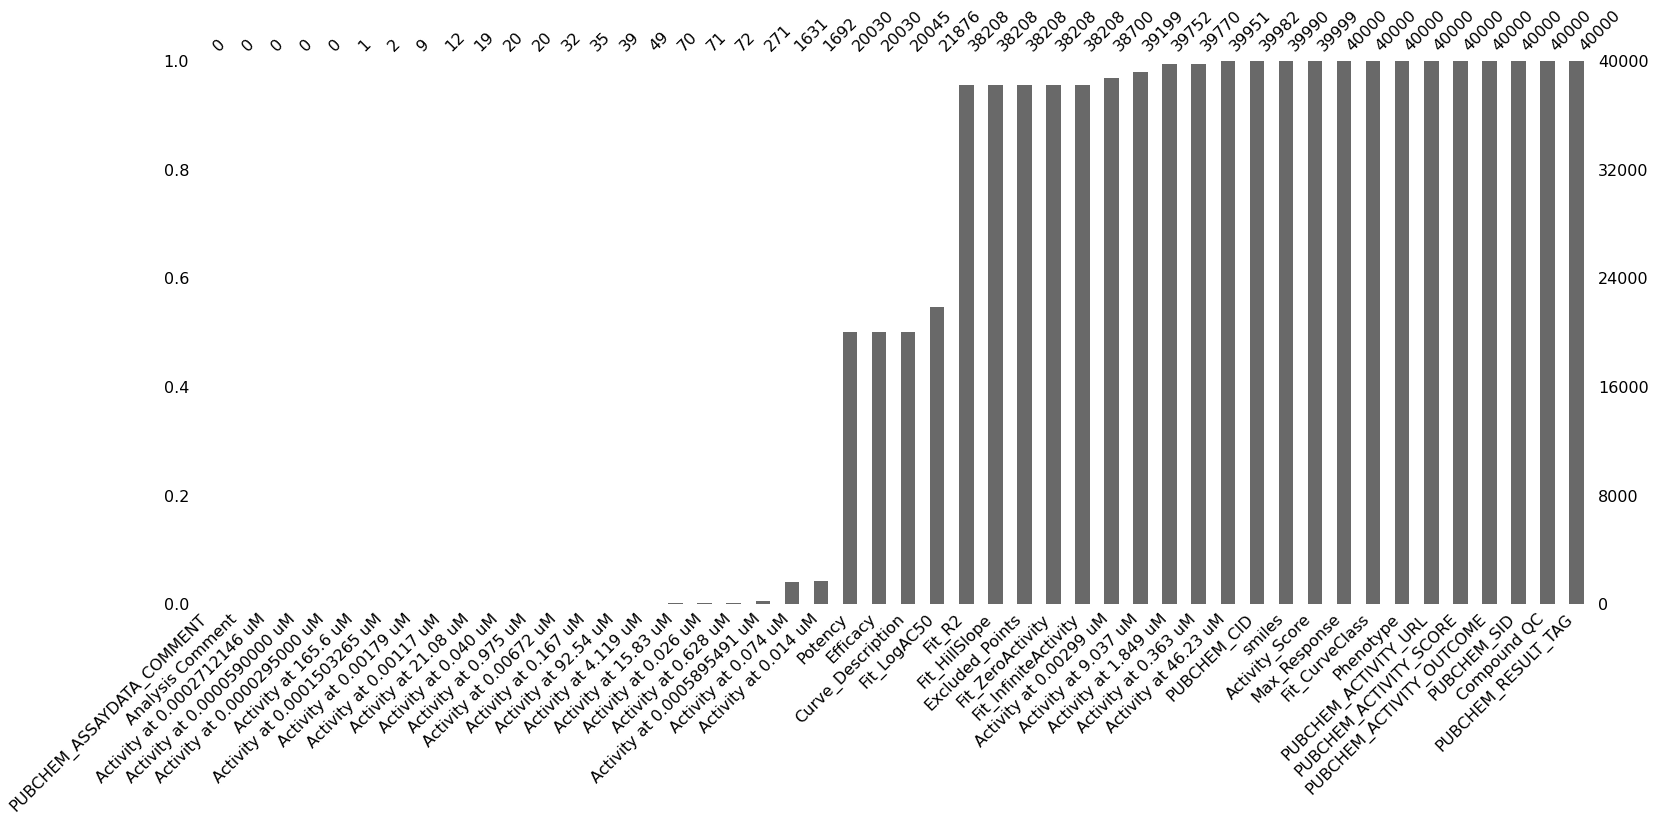

In [9]:
msno.bar(dataset,  sort="ascending")

Podemos observar que existem algumas colunas completamente constituidas por NA's, como "PUBCHEM_ASSAYDATA_COMMENT" e "Analysis Comment". Desta forma, estas colunas nao fornecem qualquer tipo de informaçao do dataset.
Destaca-se a ausencia de smile em 10 das moléculas.

É possível observar que 50,3% dos valores sao NA's.

### Drop specific features

In [10]:
dataset = dataset.dropna(axis=1, how='all')
dataset.drop(['PUBCHEM_ACTIVITY_URL', 'Compound QC'], axis=1)
dataset = dataset[dataset['smiles'].notna()]

print(dataset.shape)
print(dataset.columns)

(39990, 43)
Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE',
       'PUBCHEM_ACTIVITY_URL', 'Phenotype', 'Potency', 'Efficacy',
       'Activity_Score', 'Curve_Description', 'Fit_LogAC50', 'Fit_HillSlope',
       'Fit_R2', 'Fit_InfiniteActivity', 'Fit_ZeroActivity', 'Fit_CurveClass',
       'Excluded_Points', 'Max_Response', 'Activity at 0.0001503265 uM',
       'Activity at 0.0005895491 uM', 'Activity at 0.00117 uM',
       'Activity at 0.00179 uM', 'Activity at 0.00299 uM',
       'Activity at 0.00672 uM', 'Activity at 0.014 uM',
       'Activity at 0.026 uM', 'Activity at 0.040 uM', 'Activity at 0.074 uM',
       'Activity at 0.167 uM', 'Activity at 0.363 uM', 'Activity at 0.628 uM',
       'Activity at 0.975 uM', 'Activity at 1.849 uM', 'Activity at 4.119 uM',
       'Activity at 9.037 uM', 'Activity at 15.83 uM', 'Activity at 21.08 uM',
       'Activity at 46.23 uM', 'Activity at 92.54 uM', 'Activity at 165.6 u

Foram removidas 3 colunas constituidas apenas por NA's, o que permitiu reduzir o dataset para 45 colunas no total.
Também foram removidas colunas cuja informaçao nao será útil para as analises posteriores. Mais específicamente, foram removidas as colunas "PUBCHEM_ACTIVITY_URL" e "Compound QC", reduzindo assim o total de colunas para 43.
As 10 moléculas que não possuiam notação SMILE foram removidas do dataset.

### Graphic Analyses
#### Activity_outcome and Phenotype

In [11]:
activity = dataset.groupby('PUBCHEM_ACTIVITY_OUTCOME').size()
labels_activity = dataset.groupby('PUBCHEM_ACTIVITY_OUTCOME').size().index
dataset.groupby('PUBCHEM_ACTIVITY_OUTCOME').size()

PUBCHEM_ACTIVITY_OUTCOME
Active      19992
Inactive    19998
dtype: int64

In [12]:
fenotipo = dataset.groupby('Phenotype').size()
labels_fenotipo = dataset.groupby('Phenotype').size().index
dataset.groupby('Phenotype').size()

Phenotype
Activator       60
Inactive     19938
Inhibitor    19992
dtype: int64

#### Pie Charts Activity_outcome and Phenotype
MUDAR PARA BARRAS

Text(0.5, 1.0, 'Phenotype')

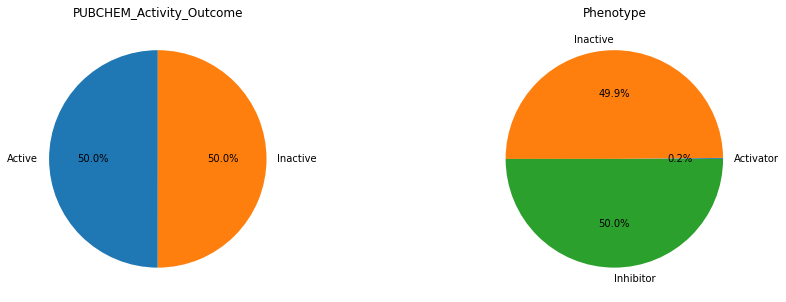

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.pie(activity, labels=labels_activity, autopct='%1.1f%%', startangle=90)
ax1.set_title('PUBCHEM_Activity_Outcome')
ax2.pie(fenotipo, labels=labels_fenotipo, autopct='%1.1f%%', startangle=360)
ax2.set_title('Phenotype')

#### Boxplots of Activity at 46.23 uM, 1.849 uM, 0.363 uM, 0.00299 uM and 9.037 uM
REVER

<AxesSubplot:title={'center':'Activity at 0.00299 uM'}, ylabel='Activity at 0.00299 uM'>

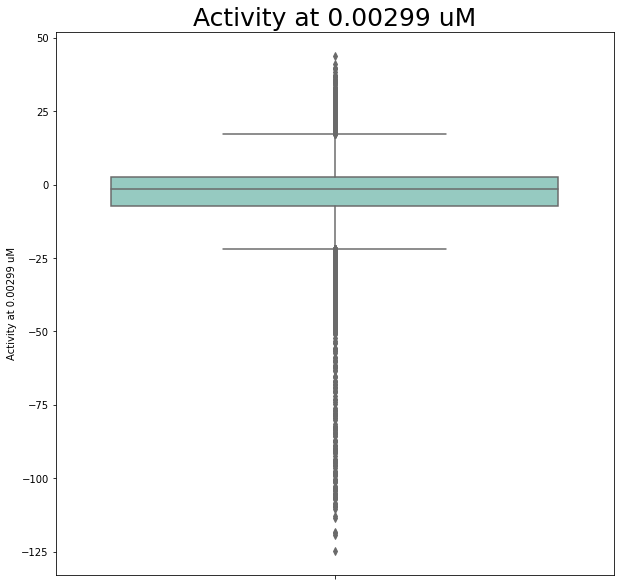

In [14]:
plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
plt.title("Activity at 0.00299 uM", fontsize=25)
sns.boxplot(y="Activity at 0.00299 uM",
            data=dataset, palette="Set3")

<AxesSubplot:title={'center':'Activity at 0.363 uM'}, ylabel='Activity at 0.363 uM'>

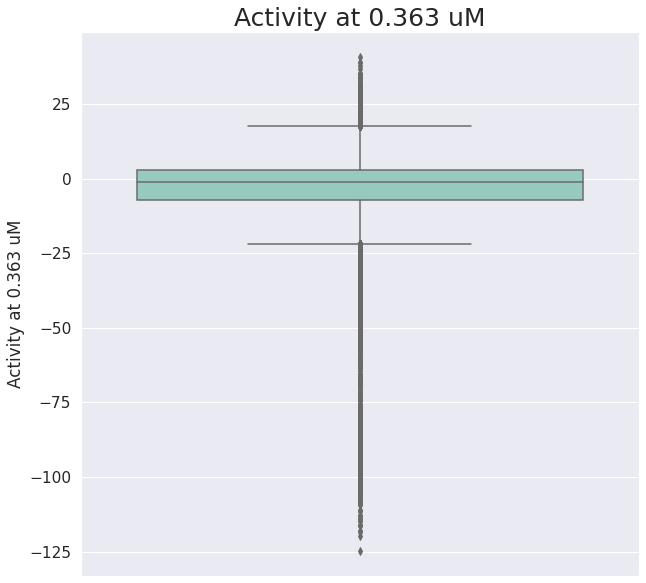

In [15]:
plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
plt.title("Activity at 0.363 uM", fontsize=25)
sns.boxplot(y="Activity at 0.363 uM",
            data=dataset, palette="Set3")

<AxesSubplot:title={'center':'Activity at 1.849 uM'}, ylabel='Activity at 1.849 uM'>

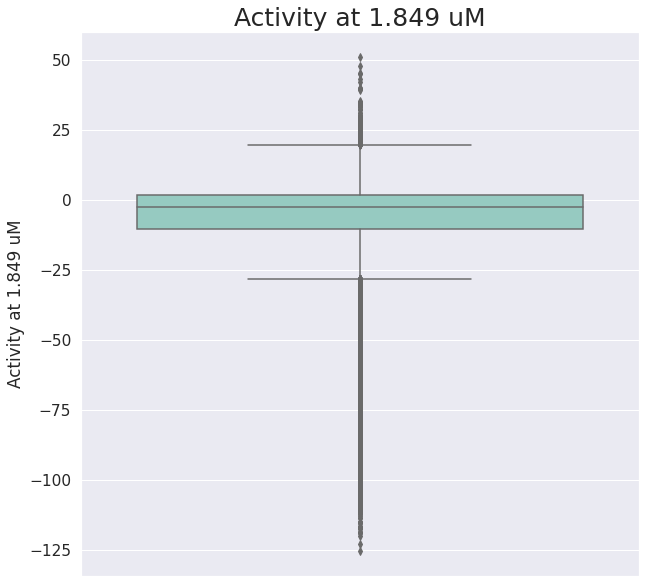

In [16]:
plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
plt.title("Activity at 1.849 uM", fontsize=25)
sns.boxplot(y="Activity at 1.849 uM",
            data=dataset, palette="Set3")

<AxesSubplot:title={'center':'Activity at 9.037 uM'}, ylabel='Activity at 9.037 uM'>

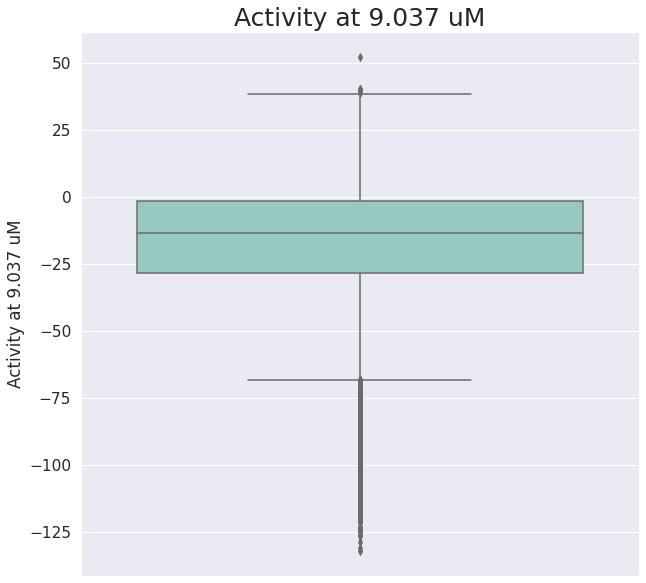

In [17]:
plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
plt.title("Activity at 9.037 uM", fontsize=25)
sns.boxplot(y="Activity at 9.037 uM",
            data=dataset, palette="Set3")

<AxesSubplot:title={'center':'Activity at 46.23 uM'}, ylabel='Activity at 46.23 uM'>

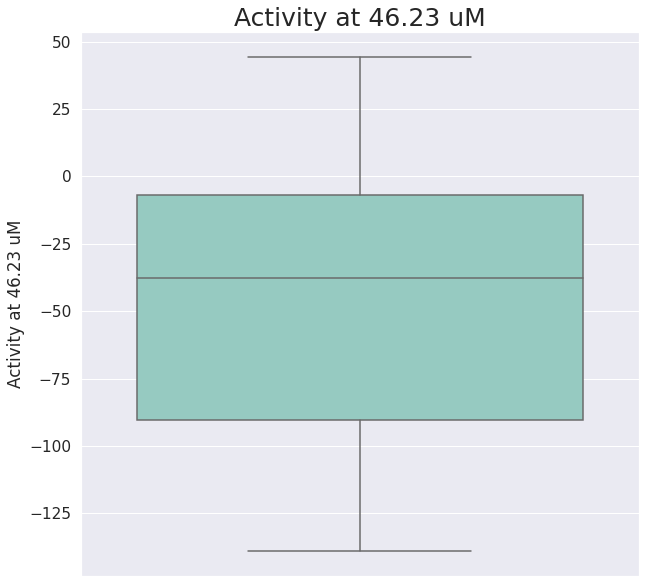

In [18]:
plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
plt.title("Activity at 46.23 uM", fontsize=25)
sns.boxplot(y="Activity at 46.23 uM",
            data=dataset, palette="Set3")

## Standardize molecules

In [19]:
def standardize(dataset, id_field ,mols_field,class_field):

    loader = CSVLoader(dataset,
                       id_field=id_field,
                       mols_field = mols_field,
                       labels_fields = class_field)

    dataset = loader.create_dataset()

    standardisation_params = {
        'REMOVE_ISOTOPE': True,
        'NEUTRALISE_CHARGE': True,
        'REMOVE_STEREO': False,
        'KEEP_BIGGEST': True,
        'ADD_HYDROGEN': False,
        'KEKULIZE': True,
        'NEUTRALISE_CHARGE_LATE': True}

    CustomStandardizer(params = standardisation_params).standardize(dataset)

    return dataset

In [20]:
dataset = standardize(file, "PUBCHEM_CID", "smiles", "PUBCHEM_ACTIVITY_OUTCOME")
dataset.save_to_csv("../dataset/standardized.csv")

/home/laptop16/anaconda3/envs/smiles/lib/python3.9/site-packages/deepmol-1.0-py3.9.egg/loaders/Loaders.py:185: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return load_csv_file(dataset_path, fields, sep, header, chunk_size)


Standardizing datapoint 0


RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:56:35] Running Uncharger
RDKit INFO: [18:

[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Removed negative charge.
[18:56:35] Removed negative charge.
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger
[18:56:35] Running Uncharger


RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:

harger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:

RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:

36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Uncharger
[18:56:36] Running Un

RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:36] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:

charger
[18:56:36] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56

RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:56:37] Running Uncharger
RDKit INFO: [18:

ncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:56:37] Running Uncharger
[18:5

RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:

6:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running 

RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:56:38] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 1000
Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:56:38] Running Uncharger
[18:

RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:

56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running

RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:

 Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18

RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:56:39] Running Uncharger
RDKit INFO: [18:

:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Running Uncharger
[18:56:39] Runnin

RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:

g Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[1

RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:56:40] Running Uncharger
RDKit INFO: [18:

8:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Running Uncharger
[18:56:40] Runni

RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[

RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:56:41] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 2000
18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Running Uncharger
[18:56:41] Runn

RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger


RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:56:42] Running Uncharger
RDKit INFO: [18:

ning Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:42] Running Uncharger
[18:56:43] Running Uncharger

RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:


[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Ru

RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:56:43] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharger
[18:56:43] Running Uncharge

RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:

r
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] R

RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:56:44] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 3000
unning Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharger
[18:56:44] Running Uncharg

RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:

er
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] 

RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:56:45] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Uncharger
[18:56:45] Running Unchar

RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:

ger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46]

RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:56:46] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncharger
[18:56:46] Running Uncha

RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:

rger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47

RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:56:47] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 4000
arger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:47] Running Uncharger
[18:56:4

RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:4

RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:

8] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Unc

RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:56:48] Running Uncharger
RDKit INFO: [18:

harger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:48] Running Uncharger
[18:56:

RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:

49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Un

RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:56:49] Running Uncharger
RDKit INFO: [18:

:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:49] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running U

RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:56:50] Running Uncharger
RDKit INFO: [18:

ncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:56:50] Running Uncharger
[18:5

RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:

RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:56:51] Running Uncharger
RDKit INFO: [18:

56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running Uncharger
[18:56:51] Running

RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Removed negative charge.
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INF

 Uncharger
[18:56:52] Running Uncharger
[18:56:52] Removed negative charge.
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Removed negative charge.
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running

RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:56:52] Running Uncharger
RDKit INFO: [18:

 Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18:56:52] Running Uncharger
[18

RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:

:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Runnin

RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncha

RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:56:53] Running Uncharger
RDKit INFO: [18:

rger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53] Running Uncharger
[18:56:53

RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:

] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Unch

RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:

arger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:5

RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:54] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:

4] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:54] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Unc

RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:

harger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:

RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:56:55] Running Uncharger
RDKit INFO: [18:

55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Uncharger
[18:56:55] Running Un

RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:

charger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56

RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:56:56] Running Uncharger
RDKit INFO: [18:

:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running Uncharger
[18:56:56] Running U

RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:

ncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:5

RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:

6:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running 

RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:56:57] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:56:57] Running Uncharger
[18:

RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:

56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running

RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:56:58] Running Uncharger
RDKit INFO: [18:

 Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18:56:58] Running Uncharger
[18

RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:

:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Runnin

RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:56:59] Running Uncharger
RDKit INFO: [18:

g Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[18:56:59] Running Uncharger
[1

RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:

8:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Runni

RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[

RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:00] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:

18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:00] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Runn

RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger


RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:57:01] Running Uncharger
RDKit INFO: [18:

[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Running Uncharger
[18:57:01] Run

RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:

ning Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger

RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:57:02] Running Uncharger
RDKit INFO: [18:


[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Running Uncharger
[18:57:02] Ru

RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharge

RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:57:03] Running Uncharger
RDKit INFO: [18:

r
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] Running Uncharger
[18:57:03] R

RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharg

RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:

er
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] Running Uncharger
[18:57:04] 

RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:57:04] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Unchar

RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:

ger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05]

RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:57:05] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncharger
[18:57:05] Running Uncha

RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:

rger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06

RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:57:06] Running Uncharger
RDKit INFO: [18:

8:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Running Uncharger
[18:57:06] Runni

RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:

8:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Runni

RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:57:07] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[18:57:07] Running Uncharger
[

RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:

18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Runn

RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger


RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:57:08] Running Uncharger
RDKit INFO: [18:

[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Running Uncharger
[18:57:08] Run

RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:

ning Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger

RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:57:09] Running Uncharger
RDKit INFO: [18:


[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Running Uncharger
[18:57:09] Ru

RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharge

RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:

r
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] R

RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:57:10] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharger
[18:57:10] Running Uncharg

RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:

er
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] 

RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Uncharger
[18:57:11] Running Unchar

RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:57:11] Running Uncharger
RDKit INFO: [18:

ger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12]

RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncha

RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:12] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:

rger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:12] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13

RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:

] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Unch

RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:57:13] Running Uncharger
RDKit INFO: [18:

arger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:13] Running Uncharger
[18:57:1

RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:

4] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Unc

RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:57:14] Running Uncharger
RDKit INFO: [18:

harger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:14] Running Uncharger
[18:57:

RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 13000
15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running U

RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:

charger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57

RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:57:15] Running Uncharger
RDKit INFO: [18:

:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:15] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running U

RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:

ncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:5

RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:57:16] Running Uncharger
RDKit INFO: [18:

7:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running Uncharger
[18:57:16] Running 

RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:

RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:57:17] Running Uncharger
RDKit INFO: [18:

57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running Uncharger
[18:57:17] Running

RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 14000
 Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[1

RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:57:18] Running Uncharger
RDKit INFO: [18:

:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Runnin

RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:

g Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[18:57:18] Running Uncharger
[1

RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:

8:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Runni

RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:57:19] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[18:57:19] Running Uncharger
[

RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:

18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Runn

RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger


RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:57:20] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 15000
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:20] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Ru

RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharg

RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:

ning Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger

RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:57:21] Running Uncharger
RDKit INFO: [18:


[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Running Uncharger
[18:57:21] Ru

RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:

:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running U

RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:

ncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:57:22] Running Uncharger
[18:5

RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:57:22] Running Uncharger
RDKit INFO: [18:

7:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running 

RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:

RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:23] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 16000
57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:23] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Runnin

RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:57:24] Running Uncharger
RDKit INFO: [18:

 Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18

RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:

:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Running Uncharger
[18:57:24] Runnin

RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:

g Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[1

RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:57:25] Running Uncharger
RDKit INFO: [18:

8:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Running Uncharger
[18:57:25] Runni

RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[

RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:57:26] Running Uncharger
RDKit INFO: [18:

18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Running Uncharger
[18:57:26] Runn

RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:57:27] Running Uncharger
RDKit INFO: [18:

[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Running Uncharger
[18:57:27] Run

RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:


[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Ru

RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:57:28] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharger
[18:57:28] Running Uncharge

RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:

r
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] R

RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:57:29] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharger
[18:57:29] Running Uncharg

RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Unchar

RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:57:30] Running Uncharger
RDKit INFO: [18:

ger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30] Running Uncharger
[18:57:30]

RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncha

RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:

rger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31

RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:57:31] Running Uncharger
RDKit INFO: [18:

] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:31] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Unch

RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:

arger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:3

RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:57:32] Running Uncharger
RDKit INFO: [18:

2] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Uncharger
[18:57:32] Running Unc

RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:

harger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:

RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:

33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Un

RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:57:33] Running Uncharger
RDKit INFO: [18:

charger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:33] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57

RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:

:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running U

RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:57:34] Running Uncharger
RDKit INFO: [18:

ncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:57:34] Running Uncharger
[18:5

RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:

r
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] R

RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharg

RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:35] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:

er
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:35] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] 

RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[

RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:57:36] Running Uncharger
RDKit INFO: [18:

18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Running Uncharger
[18:57:36] Runn

RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger


RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:57:37] Running Uncharger
RDKit INFO: [18:

[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Run

RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:

ning Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger
[18:57:37] Running Uncharger

RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:


[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Ru

RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:57:38] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 21000
nning Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharger
[18:57:38] Running Uncharg

RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:

r
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] R

RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharg

RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:57:39] Running Uncharger
RDKit INFO: [18:

er
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] Running Uncharger
[18:57:39] 

RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Unchar

RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:57:40] Running Uncharger
RDKit INFO: [18:

ger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40] Running Uncharger
[18:57:40]

RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncha

RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:

rger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41

RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:41] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:

] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:41] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Unch

RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:

arger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:4

RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:57:42] Running Uncharger
RDKit INFO: [18:

2] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Uncharger
[18:57:42] Running Unc

RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:

harger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:

RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:57:43] Running Uncharger
RDKit INFO: [18:

43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Un

RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:

charger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57:43] Running Uncharger
[18:57

RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:57:44] Running Uncharger
RDKit INFO: [18:

ncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:57:44] Running Uncharger
[18:5

RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:

7:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running 

RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:57:45] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:

RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:

57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running Uncharger
[18:57:45] Running

RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:

 Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18

RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:57:46] Running Uncharger
RDKit INFO: [18:

:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Running Uncharger
[18:57:46] Runnin

RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 24000
g Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[

RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:

18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Runn

RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:

8:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Runni

RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:57:47] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[18:57:47] Running Uncharger
[

RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:

18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Runn

RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger
[18:57:48] Running Uncharger


RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:57:48] Running Uncharger
RDKit INFO: [18:

[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Run

RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:

ning Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger
[18:57:49] Running Uncharger

RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:49] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharge

RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:

r
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] Running Uncharger
[18:57:50] R

RDKit INFO: [18:57:50] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Removed negative charge.
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INF

unning Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Removed negative charge.
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running 

RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:

RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:57:51] Running Uncharger
RDKit INFO: [18:

57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running Uncharger
[18:57:51] Running

RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:

 Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18:57:52] Running Uncharger
[18

RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:57:52] Running Uncharger
RDKit INFO: [18:

g Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[1

RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:57:53] Running Uncharger
RDKit INFO: [18:

8:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Runni

RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:53] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[

RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:

18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Runn

RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:57:54] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger
[18:57:54] Running Uncharger


RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:

[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Running Uncharger
[18:57:55] Run

RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:57:55] Running Uncharger
RDKit INFO: [18:


[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Ru

RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharge

RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:57:56] Running Uncharger
RDKit INFO: [18:

r
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] Running Uncharger
[18:57:56] R

RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharg

RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:57:57] Running Uncharger
RDKit INFO: [18:

er
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] Running Uncharger
[18:57:57] 

RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:

57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running

RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:

 Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18

RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:57:58] Running Uncharger
RDKit INFO: [18:

ger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58] Running Uncharger
[18:57:58]

RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncha

RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:57:59] Running Uncharger
RDKit INFO: [18:

rger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59] Running Uncharger
[18:57:59

RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:

] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Unch

RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:

arger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:0

RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:58:00] Running Uncharger
RDKit INFO: [18:

0] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:00] Running Uncharger
[18:58:01] Running Unc

RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:

harger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:

RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:58:01] Running Uncharger
RDKit INFO: [18:

01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Uncharger
[18:58:01] Running Un

RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:

charger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58

RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:58:02] Running Uncharger
RDKit INFO: [18:

:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running Uncharger
[18:58:02] Running U

RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:

ncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:5

RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:58:03] Running Uncharger
RDKit INFO: [18:

8:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running Uncharger
[18:58:03] Running 

RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:

RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:58:04] Running Uncharger
RDKit INFO: [18:

58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running Uncharger
[18:58:04] Running

RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:

:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Runnin

RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:58:05] Running Uncharger
RDKit INFO: [18:

g Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[18:58:05] Running Uncharger
[1

RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:

8:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Runni

RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:58:06] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[18:58:06] Running Uncharger
[

RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:

18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Runn

RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger


RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:07] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:

harger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:07] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:

RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:

08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Un

RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:58:08] Running Uncharger
RDKit INFO: [18:

charger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58:08] Running Uncharger
[18:58

RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:

:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running U

RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:58:09] Running Uncharger
RDKit INFO: [18:

ncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:58:09] Running Uncharger
[18:5

RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:

8:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running 

RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:

Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:58:10] Running Uncharger
[18:

RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:58:10] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Unchar

RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:58:11] Running Uncharger
RDKit INFO: [18:

ger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11] Running Uncharger
[18:58:11]

RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncha

RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:58:12] Running Uncharger
RDKit INFO: [18:

rger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12] Running Uncharger
[18:58:12

RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:

] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Unch

RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:

arger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:1

RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:58:13] Running Uncharger
RDKit INFO: [18:

3] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Uncharger
[18:58:13] Running Unc

RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:

harger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:

RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:58:14] Running Uncharger
RDKit INFO: [18:

14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Uncharger
[18:58:14] Running Un

RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:

charger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58

RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:

:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running U

RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:58:15] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:15] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharge

RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:

r
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] R

RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:58:16] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 34000


RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharger
[18:58:16] Running Uncharg

RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:

er
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] 

RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:58:17] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Uncharger
[18:58:17] Running Unchar

RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Unchar

RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:58:18] Running Uncharger
RDKit INFO: [18:

ger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18]

RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncharger
[18:58:18] Running Uncha

RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:

rger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19

RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:58:19] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 35000
] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:19] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Unc

RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[

RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:58:20] Running Uncharger
RDKit INFO: [18:

18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Running Uncharger
[18:58:20] Runn

RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger


RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:58:21] Running Uncharger
RDKit INFO: [18:

[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Running Uncharger
[18:58:21] Run

RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:

ning Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger

RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:58:22] Running Uncharger
RDKit INFO: [18:


[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Running Uncharger
[18:58:22] Ru

RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 36000
nning Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharg

RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharge

RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:23] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:

r
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:23] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] R

RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharg

RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:58:24] Running Uncharger
RDKit INFO: [18:

er
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] Running Uncharger
[18:58:24] 

RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Unchar

RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:58:25] Running Uncharger
RDKit INFO: [18:

ger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:25] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26]

RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 37000
 Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Unch

RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:58:26] Running Uncharger
RDKit INFO: [18:

rger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:26] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27

RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:

] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Unch

RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:58:27] Running Uncharger
RDKit INFO: [18:

arger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:27] Running Uncharger
[18:58:2

RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:

8] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Unc

RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:58:28] Running Uncharger
RDKit INFO: [18:

harger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:28] Running Uncharger
[18:58:

RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:

29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Un

RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 38000
charger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:5

RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:58:29] Running Uncharger
RDKit INFO: [18:

:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running Uncharger
[18:58:29] Running U

RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:

nning Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharge

RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:58:30] Running Uncharger
RDKit INFO: [18:

r
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] Running Uncharger
[18:58:30] R

RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:

unning Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharg

RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:

er
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] 

RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:58:31] Running Uncharger
RDKit INFO: [18:

Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Uncharger
[18:58:31] Running Unchar

RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:

Standardizing datapoint 39000
ger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32

RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:58:32] Running Uncharger
RDKit INFO: [18:

 Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncharger
[18:58:32] Running Uncha

RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:

g Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[1

RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:

8:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Runni

RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:58:33] Running Uncharger
RDKit INFO: [18:

ng Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:33] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[

RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:58:34] Running Uncharger
RDKit INFO: [18:

18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Runn

RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:

ing Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger
[18:58:34] Running Uncharger


RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:58:35] Running Uncharger
RDKit INFO: [18:

[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Running Uncharger
[18:58:35] Run

In [21]:
dataset = pd.read_csv("../dataset/standardized.csv")

In [22]:
# from rdkit.Chem import MolFromSmiles, Descriptors, AllChem, rdMolDescriptors
from rdkit.Chem import Descriptors, AllChem
from rdkit import Chem, DataStructs

def get_molecular_descriptors(molecules):
    descrip = np.zeros((len(molecules), 14))

    i = 0

    for molec in molecules:
        descrip[i, 0] = Descriptors.ExactMolWt(molec)
        descrip[i, 1] = Chem.Crippen.MolLogP(molec)
        descrip[i, 2] = Chem.Lipinski.RingCount(molec)
        descrip[i, 3] = Chem.Lipinski.NumAliphaticCarbocycles(molec)
        descrip[i, 4] = Chem.Lipinski.NumAliphaticHeterocycles(molec)
        descrip[i, 5] = Chem.Lipinski.NumAromaticRings(molec)
        descrip[i, 6] = Descriptors.TPSA(molec)
        descrip[i, 7] = Chem.Lipinski.NHOHCount(molec)
        descrip[i, 8] = Chem.Lipinski.NOCount(molec)
        descrip[i, 9] = Chem.Lipinski.NumHAcceptors(molec)
        descrip[i, 10] = Chem.Lipinski.NumHDonors(molec)
        descrip[i, 11] = Descriptors.NumValenceElectrons(molec)
        descrip[i, 12] = Chem.Lipinski.NumRotatableBonds(molec)
        descrip[i, 13] = Descriptors.NumRadicalElectrons(molec)
        i += 1

    columns = ["Molecular Weight", "LogP", "Ring Count", "NumAliphaticCarbocycles", "NumAliphaticHeterocycles",
               "NumAromaticRings", "TPSA", "NHOHCount", "NOCount", "NumHAcceptors", "NumHDonors", "NumValenceElectrons",
               "NumRotatableBonds", "NumRadicalElectrons"]

    df = pd.DataFrame(descrip, columns=columns)
    return df

In [23]:
molecules = [Chem.MolFromSmiles(smile) for smile in dataset.mols]

In [24]:
molecular_descriptors = get_molecular_descriptors(molecules)
molecular_descriptors["activity"] = dataset.y

In [25]:
molecular_descriptors

Molecular Weight     LogP  Ring Count  NumAliphaticCarbocycles  \
0            272.082874  2.99770         3.0                      0.0   
1            357.101082  3.26460         2.0                      0.0   
2            656.305744  3.68044         3.0                      0.0   
3            477.176067  0.98160         3.0                      0.0   
4            540.207627  1.42960         2.0                      0.0   
...                 ...      ...         ...                      ...   
39995        388.145678  2.43620         3.0                      0.0   
39996        235.059306  0.61890         2.0                      0.0   
39997        481.282823  5.51300         4.0                      2.0   
39998        467.267173  5.03580         4.0                      2.0   
39999        317.177964  4.63710         3.0                      0.0   

       NumAliphaticHeterocycles  NumAromaticRings    TPSA  NHOHCount  NOCount  \
0                           0.0               3.0   53.60        2.0      4.0   
1                           0.0               2.0   58.36        1.0      5.0   
2                           2.0               1.0  185.84        1.0     14.0   
3                           0.0               3.0  207.30        7.0     12.0   
4                           2.0               0.0  142.70        4.0     10.0   
...                         ...               ...     ...        ...      ...   
39995                       1.0               2.0   66.92        0.0      6.0   
39996                       1.0               1.0   92.55        1.0      7.0   
39997                       1.0               1.0   76.07        1.0      6.0   
39998                       1.0               1.0   65.07        0.0      6.0   
39999                       0.0               3.0   23.47        1.0      2.0   

       NumHAcceptors  NumHDonors  NumValenceElectrons  NumRotatableBonds  \
0                3.0         2.0                 96.0                3.0   
1                4.0         1.0                126.0                9.0   
2               13.0         1.0                256.0               17.0   
3                9.0         5.0                180.0               10.0   
4                8.0         4.0                200.0                2.0   
...              ...         ...                  ...                ...   
39995            4.0         0.0                144.0                6.0   
39996            4.0         1.0                 88.0                1.0   
39997            6.0         1.0                190.0                7.0   
39998            6.0         0.0                184.0                6.0   
39999            2.0         1.0                122.0                7.0   

       NumRadicalElectrons  activity  
0                      0.0    Active  
1                      0.0    Active  
2                      0.0    Active  
3                      0.0    Active  
4                      0.0    Active  
...                    ...       ...  
39995                  0.0  Inactive  
39996                  0.0  Inactive  
39997                  0.0  Inactive  
39998                  0.0  Inactive  
39999                  0.0  Inactive  

[40000 rows x 15 columns]

In [26]:
def generate_box_plot(feature, class_name, title, dataframe, orientation):
    plt.subplots(figsize=(20, 10))
    sns.set(font_scale=1.4)
    plt.title(title, fontsize=25)
    sns.boxplot(x=feature, y=class_name, orient=orientation,
                data=dataframe, palette="Set3")


def generate_multiple_box_plots(dataframe, title, columns, class_name):
    plt.subplots(figsize=(20, 10))
    sns.set(font_scale=1.4)
    plt.title(title, fontsize=25)
    columns.append(class_name)
    sns.boxplot(x="variable", y="value", data=pd.melt(dataframe.loc[:, columns], class_name), hue=class_name,
                palette="Set3")

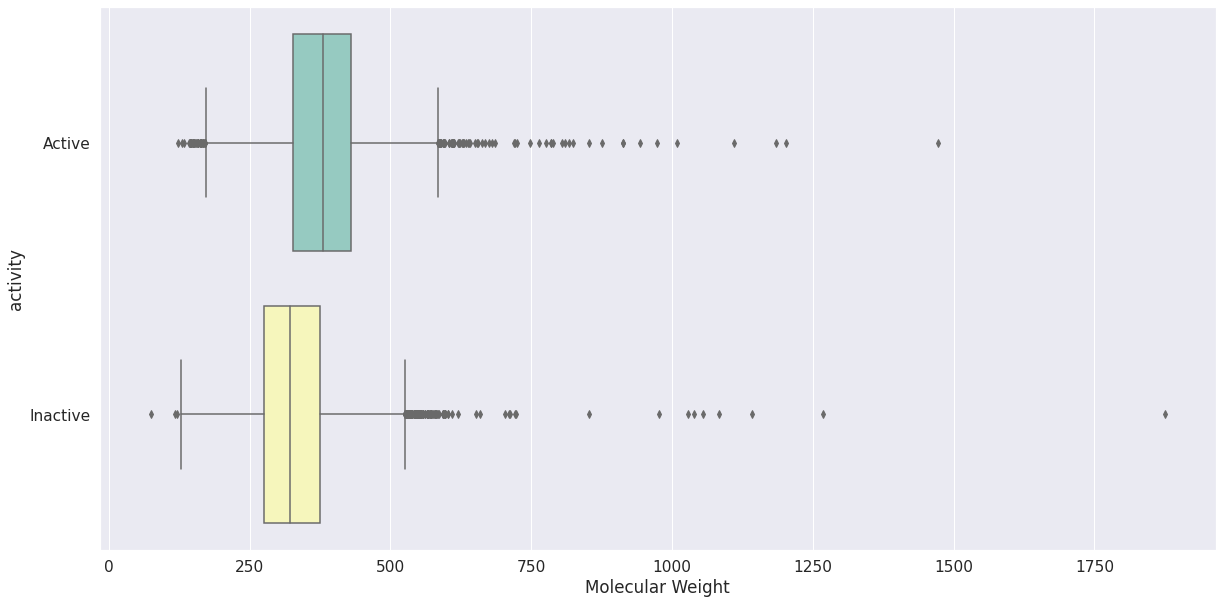

In [27]:
generate_box_plot("Molecular Weight", "activity", "", molecular_descriptors, "h")

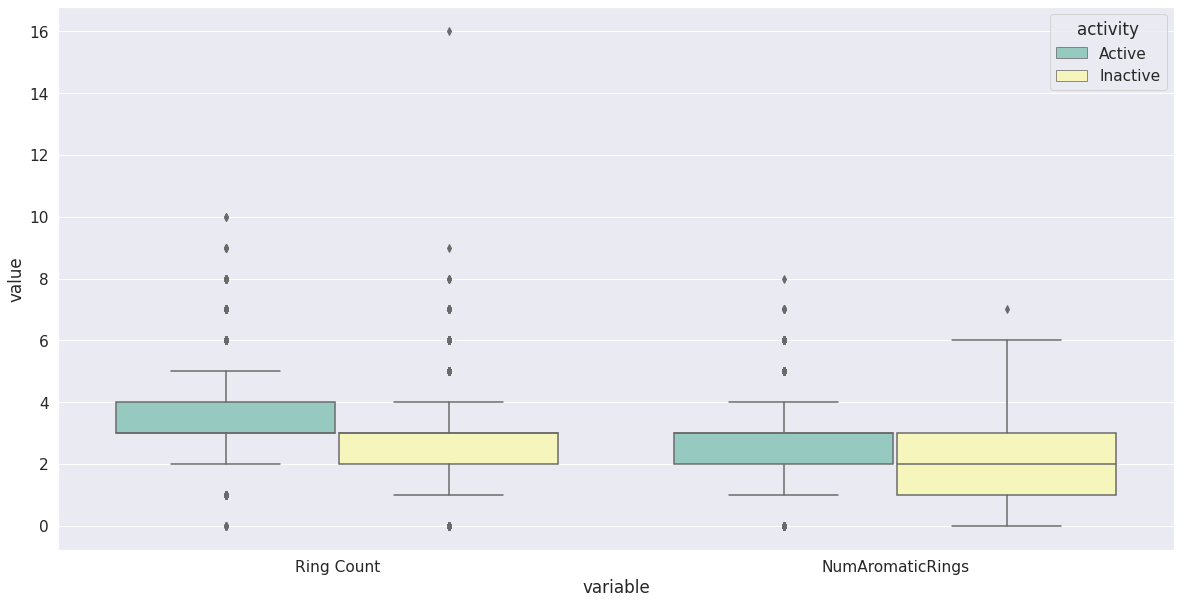

In [28]:
columns = ["Ring Count", "NumAromaticRings"]

generate_multiple_box_plots(molecular_descriptors, "", columns, "activity")

## Feature generation

In [29]:
from compoundFeaturization.rdkitFingerprints import MorganFingerprint
from loaders.Loaders import CSVLoader

loader = CSVLoader("../dataset/standardized.csv",
                   mols_field='mols',
                   labels_fields='y')

dataset = loader.create_dataset()

FileNotFoundError: [Errno 2] No such file or directory: 'standardized.csv'

### Generate fingerprints

In [ ]:
MorganFingerprint().featurize(dataset)

### Generate molecular descriptors

In [ ]:
from compoundFeaturization.rdkitDescriptors import TwoDimensionDescriptors
from scalers.sklearnScalers import StandardScaler

scaler = StandardScaler()
TwoDimensionDescriptors().featurize(dataset, scaler=scaler)

## Feature Selection

In [ ]:
from featureSelection.baseFeatureSelector import LowVarianceFS, KbestFS, BorutaAlgorithm

In [ ]:
LowVarianceFS().select_features(dataset)

In [ ]:
dataset.y

In [ ]:
import numpy as np
np.any(np.isnan(dataset.X))

In [ ]:
BorutaAlgorithm(max_iter=10, n_estimators=100).select_features(dataset)

In [ ]:
dataset.X

## Unsupervised exploration

In [ ]:
from rdkit import Chem, DataStructs
from copy import copy

In [ ]:
import numpy as np
def generate_similarities(fps):
    similarities_list = []
    bv1 = DataStructs.ExplicitBitVect(fps.shape[1])

    new_fps = []
    for fp in fps:
        bv12 = copy(bv1)
        for i,bit in enumerate(fp):
            if bit == 1:
               bv12.SetBit(i)
        new_fps.append(bv12)

    for i in range(0,2000):
        remaining_fp = new_fps[:i] + new_fps[i+1:]
        similarities = DataStructs.BulkTanimotoSimilarity(new_fps[i], remaining_fp)
        similarities.insert(i,1)
        similarities_list.append(similarities)

    return np.transpose(np.array(similarities_list))


In [ ]:
similarities = generate_similarities(dataset.X)

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# Transform the data
df = pca.fit_transform(similarities)

tsne_df = TSNE(n_components=2).fit_transform(df)

In [ ]:
labels = dataset.y

plt.figure(figsize=(20, 20))
sns.scatterplot(
    df[:, 0], df[:, 1],
    hue=labels,
    palette=sns.color_palette("deep", 2),
    legend="full",
    s=25
)

In [ ]:
labels = dataset.y

plt.figure(figsize=(20, 20))
sns.scatterplot(
    tsne_df[:, 0], tsne_df[:, 1],
    hue=labels,
    palette=sns.color_palette("deep", 2),
    legend="full",
    s=25
)